In [133]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression

In [134]:
input_file = 'data/29-molecular-RdRp-data.csv'
data = pd.read_csv(input_file)

In [135]:
data

,Drug,Binding energy(kcal/mol),TPSA (Å2),MW,XLogP3-AA,HBD,HBA,n-ROTB,n-H,n-N,n-Benzene ring,n-single bonds,n-double bond,n-O,n-F,n-C
0,Atazanavir(D1)(C38H52N6O7),-7.5,171.0,704.90,5.6,5,9,18,52,6,2,92,13,7,0,38
1,BaloxavirMarboxil(D2)(C27H23F2N3O7S),-8.2,123.0,571.60,3.8,0,12,6,23,3,2,57,11,7,2,27
2,Boceprevir(D3)(C27H45N5O5),-8.5,151.0,519.70,3.1,4,5,10,45,5,0,79,5,5,0,27
3,Cobicistat(D4)(C40H53N7O5S2),-8.4,195.0,776.00,5.7,3,10,20,40,7,2,98,13,5,0,40
4,Daclatasvir(D5)(C40H50N8O6),-9.5,175.0,738.90,5.1,4,8,13,40,8,2,95,14,6,0,40
5,Doravirine(D6)(C17H11ClF3N5O3),-8.7,98.0,425.70,2.1,1,8,4,11,5,1,33,8,3,3,17
6,Dolutegravir(D7)(C20H19F2N3O5),-8.9,99.2,419.40,2.4,2,8,3,19,3,1,44,8,5,2,20
7,Elvitegravir(D8)(C23H23ClFNO5),-7.3,87.1,447.90,5.3,2,7,7,23,1,2,47,9,5,1,23
8,Entecavir(D9)(C12H15N5O3),-7.7,126.0,277.80,-1.3,4,5,2,15,5,0,32,5,3,0,12
9,Famciclovir(D10)(C14H19N5O4),-7.3,122.0,321.33,0.0,1,8,9,19,5,0,37,6,4,0,14


In [136]:
X = data.drop(columns=['Binding energy(kcal/mol)', 'Drug'])
y = data['Binding energy(kcal/mol)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10, random_state=42)

In [137]:
pls = PLSRegression(n_components=10)
pls.fit(X_train, y_train)
y_pred = pls.predict(X_test)

In [146]:
# evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)
rmrpe = ((((y_test - y_pred.flatten()) / y_test) ** 2).mean()) ** 0.5 * 100
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Root Mean Square Relative Percent Error: {rmrpe}%')

Mean Squared Error: 0.8645502337060076
Root Mean Squared Error: 0.9298119345900049
R^2 Score: -2.070135773103721
Root Mean Square Relative Percent Error: 11.0296488433254%


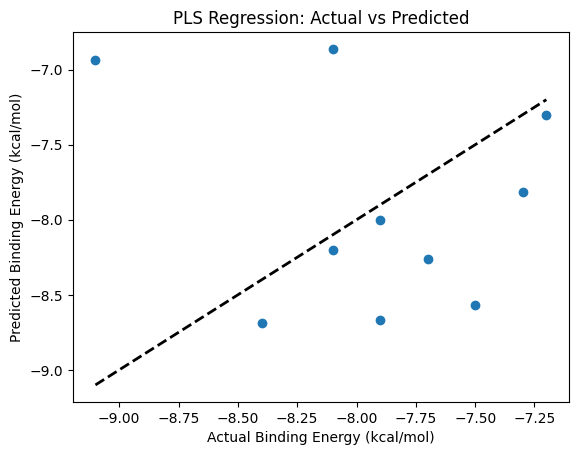

In [147]:
# visualize the results
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Binding Energy (kcal/mol)')
plt.ylabel('Predicted Binding Energy (kcal/mol)')
plt.title('PLS Regression: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()